In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict

In [127]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [154]:
topo_to_log_file_dict = {
    # "B4": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_17_8_45_6_530\\B4_DemandPinning.txt",
    #        "..\\logs\\demand_pinning_sweep_thresh\\2022_6_18_15_44_37_414\\B4_DemandPinning.txt"
    # ],
    "B4": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\B4_DemandPinning.txt"],
    # "SWAN": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_17_8_45_6_530\\SWAN_DemandPinning.txt",
    #          "..\\logs\\demand_pinning_sweep_thresh\\2022_6_18_15_44_37_414\\SWAN_DemandPinning.txt"
    # ],
    "SWAN": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\SWAN_DemandPinning.txt"],
    # "Abilene": ["..\logs\\demand_pinning_sweep_thresh\\2022_6_17_8_45_6_530\\Abilene_DemandPinning.txt",
    #         "..\logs\\demand_pinning_sweep_thresh\\2022_6_18_15_44_37_414\\Abilene_DemandPinning.txt"
    # ],
    "Abilene": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\Abilene_DemandPinning.txt"],
}
topo_to_num_links = {
    "B4": 38,
    "SWAN": 24,
    "Abilene": 26
}
topology_to_threshold_to_gap = defaultdict(dict)

In [155]:
for (topo, log_file_list) in topo_to_log_file_dict.items():
    thresh_list = []
    gap_list = []
    for log_file in log_file_list:
        with open(log_file, "r") as fp:
            link_cap = int(fp.readline())
            for fline in fp.readlines():
                if fline.startswith("#"):
                    continue
                thresh_perc, thresh, opt, heuristic, gap = fline.split(",")
                gap = float(gap)
                thresh_perc = float(thresh_perc)
                norm_gap = gap * 100 / (topo_to_num_links[topo] * link_cap)
                thresh_list.append(thresh_perc)
                gap_list.append(norm_gap)
    thresh_list = np.array(thresh_list)
    gap_list = np.array(gap_list)
    sorted_args = np.argsort(thresh_list)
    topology_to_threshold_to_gap[topo] = (thresh_list[sorted_args], gap_list[sorted_args])

In [156]:
topology_to_threshold_to_gap

defaultdict(dict,
            {'B4': (array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
              array([1.11186895e-08, 1.13157895e+01, 2.27631579e+01, 3.05263158e+01,
                     3.39473684e+01, 3.68421053e+01, 3.82894737e+01])),
             'SWAN': (array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
              array([4.41646019e-08, 4.27083335e+00, 8.54166667e+00, 1.28125000e+01,
                     1.70833333e+01, 2.08333333e+01, 2.56250000e+01])),
             'Abilene': (array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
              array([1.61347886e-08, 1.09615385e+01, 2.19230769e+01, 3.26923077e+01,
                     4.00000000e+01, 4.42307692e+01, 4.67307692e+01]))})

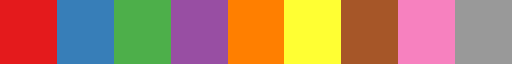

In [157]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [158]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["--", "--", ":", "--"]

In [161]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
for idx, (topo_name, output) in enumerate(topology_to_threshold_to_gap.items()):
    plt.plot(output[0], output[1], label=f"{topo_name}", 
             color=colors[idx], 
             linestyle=line_styles[idx], 
             marker="o", 
             mfc="white", 
             mec=colors[idx], 
             markersize=10, 
             linewidth=3, 
             markeredgewidth=3
    )

plt.legend(fontsize=12, loc="lower right")
plt.xlabel("norm threshold (%)", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks([0, 10, 20, 30, 40, 50], fontsize=14)
plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15], fontsize=14)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.savefig(output_fig_dir + "demandpinning_sweep_threshold.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "demandpinning_sweep_threshold.pdf", bbox_inches="tight", format="pdf", dpi=300)

SyntaxError: keyword argument repeated: markersize (2052535342.py, line 13)

<Figure size 2400x900 with 0 Axes>